#### 第三章 神经网络

##### 3.1 从感知机到神经网络

最基本的神经网络分为三层

![神经网络的例子](./asset/图3-1神经网络的例子.jpg)

其中：

第0层为输入层，

第1层为隐藏层，

第2层为输出层，

###### 3.1.2 复习感知机

基本形式

![感知机](./asset/图2-1感知机.jpg)

$$
y = 
\begin{cases}
0, & (b + w_1 x_1 + w_2 x_2 \le 0) \\
1, & (b + w_1 x_1 + w_2 x_2 > 0)
\end{cases}
$$

其中：
$x1$, $x2$为输入参数

$y$为输出参数

$b$为偏置参数

$w1$, $w2$为权重参数

##### 3.1.3 激活函数登场

![明确显示激活函数的计算过程](./asset/图3-4明确显示激活函数的过程.jpg)


在基本形式中，令

$$
a = b + w_1 x_1 + w_2 x_2
$$

$$
y = h(a)
$$

则：
$$
h(x) = 
\begin{cases}
0, & (x \le 0) \\
1, & (x > 0)
\end{cases}
$$

$$
a = b + w_1 x_1 + w_2 x_2
$$

$h( )$即为激活函数（activation function）

此激活函数以阈值为界，一旦输入超过阈值，就切换输出，这样的函数称为”阶跃函数“


##### 阶跃函数

$$
h(x) = 
\begin{cases}
0, & (x \le 0) \\
1, & (x > 0)
\end{cases}
$$

使用Python实现阶跃函数

In [54]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

In [55]:
# test
print(step_function(3))  # Output: 1
print(step_function(-2.5)) # Output: 0

1
0


In [56]:
# import numpy as np
# step_function(np.array([1.0, 2.0]))  
# # error:ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

这个实现简单、易于理解，但是参数x只能接受实数（浮点数），不允许参数取Numpy数组

我们来修改一下

In [57]:
def step_function_2(x):
    y = x > 0
    return y.astype(int)  # Convert boolean to int (True->1, False->0)

In [58]:
# step by step
import numpy as np
x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [59]:
y = x > 0
y

array([False,  True,  True])

In [60]:
y_int = y.astype(int)
y_int

array([0, 1, 1])

In [61]:
# test step_function_2
print(x)
step_function_2(x)  # Output: [0 1 1]

[-1.  1.  2.]


array([0, 1, 1])

##### 阶跃函数的图形
下面我们就用图来表示阶跃函数，使用Matplotlib库

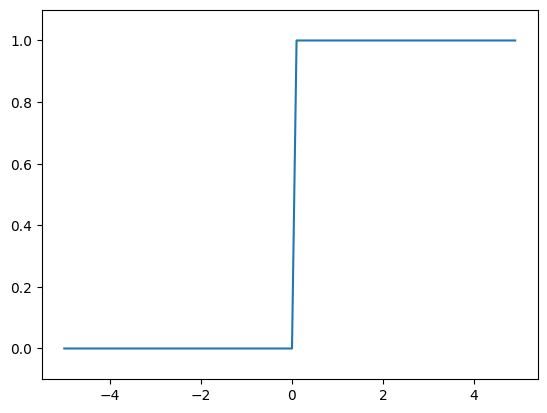

In [62]:
import numpy as np
import matplotlib.pylab as plt

# def step_function(x):
#     y = x > 0
#     return y.astype(int)

def step_function(x):
    return np.array(x > 0, dtype=int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # Specify y-axis range
plt.show()

如果将激活函数从阶跃函数切换成其他函数，就可以进入神经网络的世界了

#### 3.2 激活函数

##### 3.2.1 sigmoid函数

神经网络中经常使用的一个激活函数，就是sigmoid函数（sigmoid function）

$$
h(x) = \frac{1}{1 + e^{-x}}
$$

e是纳皮尔常数（自然对数的底数），约等于2.71828

这个函数看上去有些复杂，但它也仅仅是个函数而已。

输入一个值，得到一个值。

##### sigmoid函数的实现
下面我们用Python实现sigmoid函数

In [63]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

其中 np.exp(-x)代替 $e^{-x}$

会不会担心这个函数是否适合于数组参数呢？

In [64]:
import numpy as np
x = np.array([-1.0, 1.0, 2.0])
print(x)
sigmoid(x)

[-1.  1.  2.]


array([0.26894142, 0.73105858, 0.88079708])

从结果来看这是可以的，是不是很神奇

这是由于NumPy的广播功能

In [65]:
1 + x

array([0., 2., 3.])

标量于数组相加，则标量会与NumPy数组的各个元素进行运算

同理，sigmoid函数也会在数组的每个参数上运行

##### sigmoid函数的图形

与上面的阶跃函数相似，唯一不同的是，函数使用了sigmoid函数

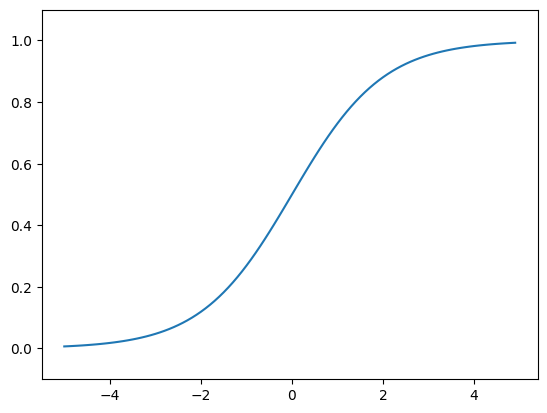

In [66]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x)

plt.plot(x, y1)
plt.ylim(-0.1, 1.1) # Specify y-axis range
plt.show()


##### sigmoid函数与阶跃函数的比较

区别：

sigmoid的是连续平滑的曲线（可导），这一点对神经网络学习直观重要

注意：平滑性在神经网络的学习中非常重要，因为平滑代表着可导性，而可导性是进行微积分运算的必要条件。

在下图中我们可以明显的看到



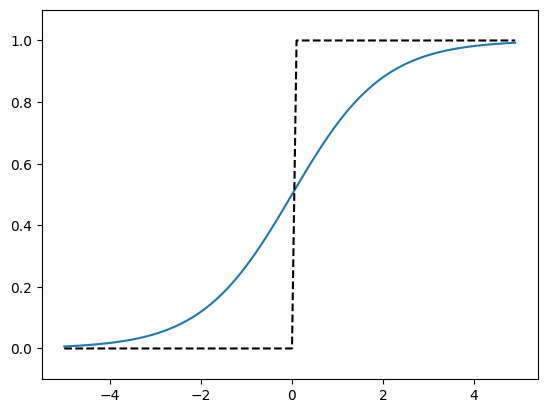

In [67]:
import numpy as np  
import matplotlib.pylab as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def step_function(x):
    return np.array(x > 0, dtype=int)

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x)
y2 = step_function(x)

plt.plot(x, y1)
plt.plot(x, y2, 'k--')
plt.ylim(-0.1, 1.1) # Specify y-axis range
plt.show()

共同点：

虽然在平滑性上有所差异，但具有相似的形状

输出的信号值都在0到1之间



# Sigmoid函数求导过程

给定函数：
$$h(x) = \frac{1}{1 + e^{-x}}$$

## 步骤1：重写函数形式
$$h(x) = (1 + e^{-x})^{-1}$$

## 步骤2：应用链式法则求导
$$h'(x) = -1 \cdot (1 + e^{-x})^{-2} \cdot \frac{d}{dx}(1 + e^{-x})$$

## 步骤3：求内部函数的导数
$$\frac{d}{dx}(1 + e^{-x}) = -e^{-x}$$

## 步骤4：将结果代入
$$h'(x) = -1 \cdot (1 + e^{-x})^{-2} \cdot (-e^{-x})$$
$$h'(x) = \frac{e^{-x}}{(1 + e^{-x})^2}$$

## 步骤5：整理表达式
$$h'(x) = \frac{e^{-x}}{(1 + e^{-x})(1 + e^{-x})}$$
$$h'(x) = \frac{1}{1 + e^{-x}} \cdot \frac{e^{-x}}{1 + e^{-x}}$$

## 步骤6：进一步简化
$$h'(x) = \frac{1}{1 + e^{-x}} \cdot \frac{1 + e^{-x} - 1}{1 + e^{-x}}$$
$$h'(x) = \frac{1}{1 + e^{-x}} \cdot \left(1 - \frac{1}{1 + e^{-x}}\right)$$

## 最终结果
$$h'(x) = h(x) \cdot (1 - h(x))$$

## 重要性质
1. Sigmoid函数的导数可以用原函数本身来表示
2. 这个性质在神经网络的反向传播算法中非常有用
3. 当h(x)接近0或1时，导数会变得很小，这可能导致梯度消失问题


##### 3.2.6 非线性函数

##### ReLU函数

ReLU(Rectified Linear Unit 调整后的线性单元)函数是神经网络中常用的激活函数，它的表达式如下：

$$
h(x) = 
\begin{cases}
x, & (x > 0) \\
0, & (x \le 0)
\end{cases}
$$

ReLU函数在输入大于0时，直接输出该值；在输入小于等于0时，输出0

##### ReLU函数的实现

In [68]:
def relu(x):
    return np.maximum(0, x)

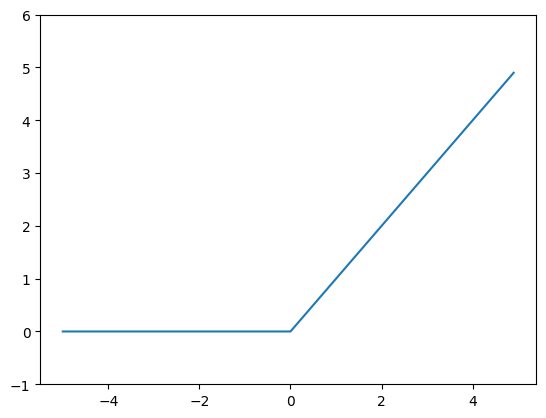

In [69]:
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x) 
plt.plot(x, y)
plt.ylim(-1.0, 6.0) # Specify y-axis range
plt.show()

##### ReLU函数的导数

ReLU函数的导数表达式如下：

$$
h'(x) = 
\begin{cases}
1, & (x > 0) \\
0, & (x \le 0)
\end{cases}
$$

##### 导数解释
1. 当x > 0时，ReLU函数变为h(x) = x，其导数为1
2. 当x ≤ 0时，ReLU函数变为h(x) = 0，其导数为0

##### ReLU导数的实现
```python
def relu_derivative(x):
    return 1 if x > 0 else 0


本章总结：

激活函数的要求：本身非线性，

疑问：输出接近两种值？

疑问：可导性？

疑问：符合这两个要求的函数就可以吗？ 比如

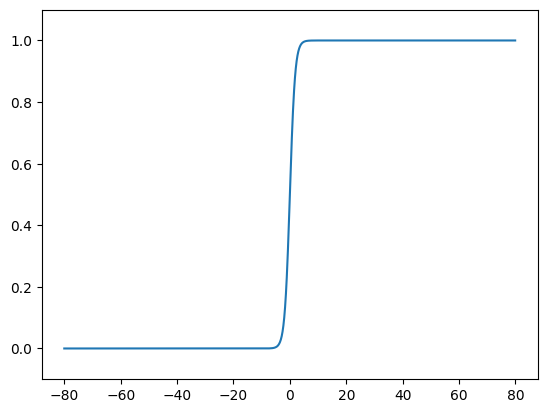

In [70]:
def f(x) :
    return 1 / (1+3**(-x))

x = np.arange(-80.0, 80.0, 0.1)
y1 = f(x)

plt.plot(x, y1)
plt.ylim(-0.1, 1.1) # Specify y-axis range
plt.show()

阶跃函数：输出0， 1

sigmoid函数：输出接近0还是接近1的一个值

ReLU函数：输出0和本身

这三种都是一种信号传递

#### 3.4 3层神经网络的实现

使用NumPy多维数组的运算，可以高效实现神经网络

这一节我们用NumPy多维数组来实现一个3层神经网络

##### 第0层到第1层

即从输入层到第一层

![从输入层到第一层](./asset/图3-17从输入层到第1层的信号传递.jpg)


公式：

$$
A^{(1)} = X W^{(1)} + B^{(1)}
$$

其中：

$$
A^{(1)} 
= 
\begin{pmatrix}
a^{(1)}_1 & a^{(1)}_2 & a^{(1)}_3
\end{pmatrix},
$$

$$
X
=
\begin{pmatrix}
x_1 & x_2
\end{pmatrix},
$$

$$
B^{(1)}
=
\begin{pmatrix}
b^{(1)}_1 & b^{(1)}_2 & b^{(1)}_3
\end{pmatrix},
$$

$$
W^{(1)}
=
\begin{pmatrix}
w^{(1)}_{11} & w^{(1)}_{21} & w^{(1)}_{31} \\
w^{(1)}_{12} & w^{(1)}_{22} & w^{(1)}_{32}
\end{pmatrix}.
$$


In [71]:
import numpy as np

# 定义X，W1，B1
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

# 查看X, W1, B1的形状 
print(X.shape)
print(W1.shape)
print(B1.shape) 


(2,)
(2, 3)
(3,)


In [72]:
np.dot(X, W1)

array([0.2, 0.5, 0.8])

In [73]:
A1 = np.dot(X, W1) + B1
A1

array([0.3, 0.7, 1.1])

然后使用激活函数，将A1变为非线性的关系

下面使用sigmoid函数作为激活函数，得到第一层的输出Z1

![第一层的输出Z1](./asset/图3-18从输入层到第1层的信号传递.jpg)

In [74]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

Z1 = sigmoid(A1)
Z1

array([0.57444252, 0.66818777, 0.75026011])

##### 第一层到第二层

![第一层到第二层](./asset/图3-19第一层到第二层的信号传递.jpg)


由第一层Z1是1*3的矩阵，第二层的W2是3*2的矩阵，所以Z1*W2是1*2的矩阵

In [75]:
# 定义W2，B2
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

# 查看W2, B2的形状
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)
Z2

(3, 2)
(2,)


array([0.62624937, 0.7710107 ])

##### 第2层到第3层

即第2层到输出层的信号传递

![第2层到第3层](./asset/图3-20从第2层到输出层的信号传递.jpg)

与之前类似，只不过激活函数有所不同

In [76]:
# 定义恒等函数
def identity_function(x):
    return x

# 定义W3，B3
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

# 查看W3, B3的形状
print(W3.shape)
print(B3.shape)

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)
Y

(2, 2)
(2,)


array([0.31682708, 0.69627909])

在这里我们定义了identity_function函数，即恒等函数，即输入什么就输出什么，所以A3和Y是一样的，其实没有必要特意定义。

这里只是为了形式上的统一

通常输出层的激活函数用 $\sigma()$ 表示

不同类型的问题在输出层使用的函数不同，这个我们后续会一一介绍

#### 代码总结

至此我们已经完成了3层神经网络的实现，我们把之前的代码整理在一起

In [77]:
# 定义函数，定义空字典network，将权重数据放入

def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network


In [78]:
# 定义函数，导入权重与X，得到Y
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

In [79]:
# 调用函数
network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
y

array([0.31682708, 0.69627909])

这里出现了forward函数，这个函数的作用是前向传播，即从输入层到输出层的信号传递，我们还会介绍backward函数，即反向传播，即从输出层到输入层的信号传递。

##### 3.5 输出层设计

机器学习的问题大致可以分为：分类问题和回归问题

分类问题是数据属于哪一个类别的问题，比如区分图像中的人是男是女

回归问题是根据某个输入预测一个（连续的）数值问题，比如根据图像预测这个人的体重

输出层的激活函数，要根据求解问题的性质而定

一般地，回归问题使用恒等函数，二分类问题使用sigmoid函数，多元分类问题可以使用softmax函数

本节我们就来介绍一下softmax函数

##### softmax函数

公式：


$$
y_k = \frac{\exp(a_k)}{\displaystyle\sum_{i=1}^{n} \exp(a_i)}
$$

其中，输出的$y_k$值

分子为输入参数 $a_k$ 的指数函数

分母为所有输入参数指数函数的和


输入向量：$a = [1,\, 2,\, 3,\, 4,\, 5]$

Softmax 会计算：
$e^1,\ e^2,\ e^3,\ e^4,\ e^5$

然后把它们除以总和。

结果是 5 个概率：

- 值越大的 $a_k$，对应概率越大  
- 所有概率加起来一定是 1

也就是说：
每一个 $y_k$ =「第 k 项占所有项的比例」



代码实现：



In [80]:
import numpy as np

# softmax函数的代码实现
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a) # 指数函数
print(exp_a)

[ 1.34985881 18.17414537 54.59815003]


In [81]:
sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

74.1221542101633


In [82]:
y = exp_a / sum_exp_a
y

array([0.01821127, 0.24519181, 0.73659691])

我们将softmax整合为一个函数

In [83]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

##### 实现softmax的注意事项

上述函数存在溢满出问题，因为指数函数的值很容易变得非常大

如$e^{10}$会超过20000，$e^{100}$会变成一个后面有40多个0的超大值，$e^{1000}$的结果会返回一个无穷大的inf值

如果在超大值之间进行除法运算，结果会出现“不确定”的情况

提示：
计算机在处理“数”时，数值必须在4字节或8字节的有限数据长度内，也就是可以表示的数值范围时有限的。

因此会出现超大值无法显示的问题，这个问题成为称为溢出

为了解决这个问题，我们将softmax函数进行改进

将分子分母同时乘以C：


$$
y_k 
= \frac{\exp(a_k)}{\displaystyle\sum_{i=1}^{n} \exp(a_i)}
$$

$$
= \frac{C \exp(a_k)}{C \displaystyle\sum_{i=1}^{n} \exp(a_i)}
$$

$$
= \frac{\exp(a_k + \log C)}{\displaystyle\sum_{i=1}^{n} \exp(a_i + \log C)}
$$

$$
= \frac{\exp(a_k + C')}{\displaystyle\sum_{i=1}^{n} \exp(a_i + C')}
$$


$C > 0$ 是任意正常数  
$C' = \log C$


式中说明，在进行 softmax 的指数函数的运算时，加上（或者减去）某个常数并不会改变运算的结果。这里的 $c'$ 可以使用任何值，但是为了防止溢出，一般会使用输入信号中的最大值。我们来看一个具体的例子。（主要目的就是让 $\exp(a_k + C')$ 变小，防止溢出）

In [84]:
def softmax(a):
    c = np.max(a) ## 取得输入信号的最大值
    exp_a = np.exp(a - c)  # 防止溢出,这里减去常数c不会改变结果
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

##### softmax函数的特征
使用我们改良后的softmax函数，可以计算出如下结果

In [85]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
y

array([0.01821127, 0.24519181, 0.73659691])

In [86]:
np.sum(y)  # 验证输出和为1

np.float64(1.0)

##### 输出值总和为1

可以看出，softmax 函数的输出是 0.0 到 1.0 之间的实数，并且总和为 1。因此，可以将输出解释为概率。

这是 softmax 的一个重要性质。

因为有了这个性质，我们可以把softmax()函数的输出解释为概率

y[0]的概率为0.01821127

y[1]的概率为0.24519181

y[2]的概率为0.73659691

从概率结果来看，我们可以得出结论：

“因为第2个元素的概率最高，所以答案是第2个类别“

或

“有73.6%的概率是第2个类别，有24.5%的概率是第1个类别，有1.8%的概率是第0个类别”

##### 单调递增性质

softmax()为单调递增函数，输入的a之间的大小关系，与y之间的大小关系是对应的。


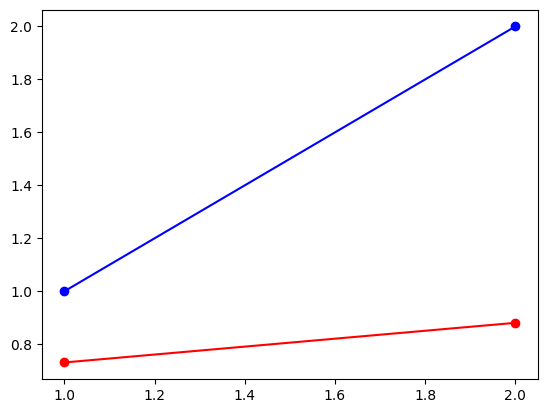

In [87]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 二分类

import numpy as np
import matplotlib.pylab as plt
x = np.array([1, 2])
y = sigmoid(x)
plt.plot(x, y, color='red', marker='o', linestyle='solid')
plt.plot(x, x, color='blue', marker='o', linestyle='solid')
plt.show()


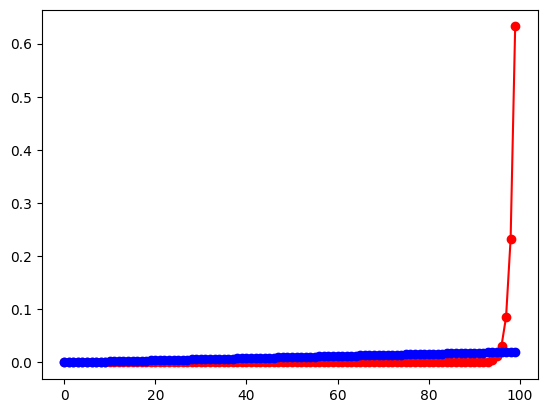

In [88]:
# 多分类， 对比softmax与线性的求和
import numpy as np
import matplotlib.pylab as plt

def softmax(a):
    c = np.max(a) ## 取得输入信号的最大值
    exp_a = np.exp(a - c)  # 防止溢出,这里减去常数c不会改变结果
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

x = np.arange(100)
e = softmax(x)
f = x / np.sum(x)
plt.plot(x, e, color='red', marker='o', linestyle='solid')
plt.plot(x, f, color='blue', marker='o', linestyle='solid')
plt.show()

##### 输出层神经元的数量

输出层神经元的数量需要根据待解决的问题来定。
如手写数字的识别问题，输出层的类别可以设定为0-9的数字，共10个。

softmax函数的内容完成！！！